In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x_train = [ 6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546, 5.7107, 14.164 , 5.734 , 8.4084, 5.6407, 5.3794, 6.3654, 5.1301, 6.4296, 7.0708, 6.1891, 20.27 , 5.4901, 6.3261, 5.5649, 18.945 , 12.828 , 10.957 , 13.176 , 22.203 , 5.2524, 6.5894, 9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836 , 6.3534, 5.4069, 6.8825, 11.708 , 5.7737, 7.8247, 7.0931, 5.0702, 5.8014, 11.7 , 5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279 , 14.908 , 18.959 , 7.2182, 8.2951, 10.236 , 5.4994, 20.341 , 10.136 , 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274 , 5.1077, 5.7292, 5.1884, 6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002 , 5.5204, 5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394 , 5.4369]


In [6]:
y_train = [17.592 , 9.1302 , 13.662 , 11.854 , 6.8233 , 11.886 , 4.3483 , 12. , 6.5987 , 3.8166 , 3.2522 , 15.505 , 3.1551 , 7.2258 , 0.71618, 3.5129 , 5.3048 , 0.56077, 3.6518 , 5.3893 , 3.1386 , 21.767 , 4.263 , 5.1875 , 3.0825 , 22.638 , 13.501 , 7.0467 , 14.692 , 24.147 , -1.22 , 5.9966 , 12.134 , 1.8495 , 6.5426 , 4.5623 , 4.1164 , 3.3928 , 10.117 , 5.4974 , 0.55657, 3.9115 , 5.3854 , 2.4406 , 6.7318 , 1.0463 , 5.1337 , 1.844 , 8.0043 , 1.0179 , 6.7504 , 1.8396 , 4.2885 , 4.9981 , 1.4233 , -1.4211 , 2.4756 , 4.6042 , 3.9624 , 5.4141 , 5.1694 , -0.74279, 17.929 , 12.054 , 17.054 , 4.8852 , 5.7442 , 7.7754 , 1.0173 , 20.992 , 6.6799 , 4.0259 , 1.2784 , 3.3411 , -2.6807 , 0.29678, 3.8845 , 5.7014 , 6.7526 , 2.0576 , 0.47953, 0.20421, 0.67861, 7.5435 , 5.3436 , 4.2415 , 6.7981 , 0.92695, 0.152 , 2.8214 , 1.8451 , 4.2959 , 7.2029 , 1.9869 , 0.14454, 9.0551 , 0.61705]


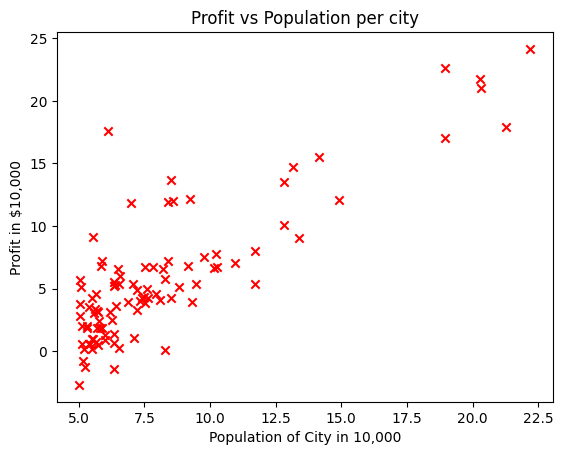

In [7]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Profit vs Population per city')
plt.xlabel('Population of City in 10,000')
plt.ylabel('Profit in $10,000')
plt.show()



Theta (coefficients): [-3.89578088  1.19303364]


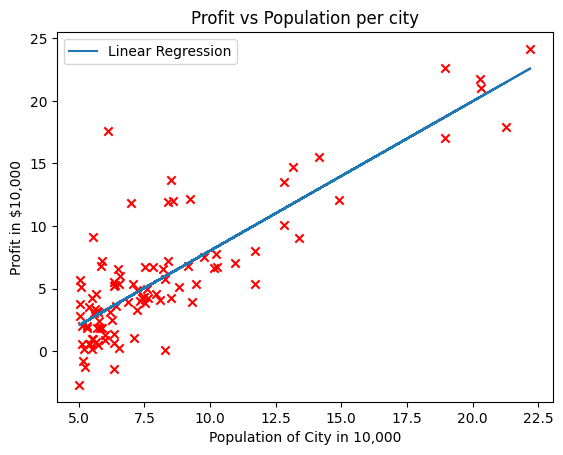

In [8]:
# prompt: Your goal is to build a linear regression model to fit this data.

import numpy as np

# Convert the lists to numpy arrays
X = np.array(x_train).reshape(-1, 1)  # Reshape to a column vector
y = np.array(y_train)

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Calculate the coefficients using the normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Print the coefficients
print("Theta (coefficients):", theta)

# Make predictions using the calculated coefficients
y_pred = X @ theta

# Plot the linear regression line along with the data
plt.scatter(x_train, y_train, marker='x', c='r')
plt.plot(x_train, y_pred, label='Linear Regression')
plt.title('Profit vs Population per city')
plt.xlabel('Population of City in 10,000')
plt.ylabel('Profit in $10,000')
plt.legend()
plt.show()

Optimized Theta (coefficients): [-3.63029144  1.16636235]


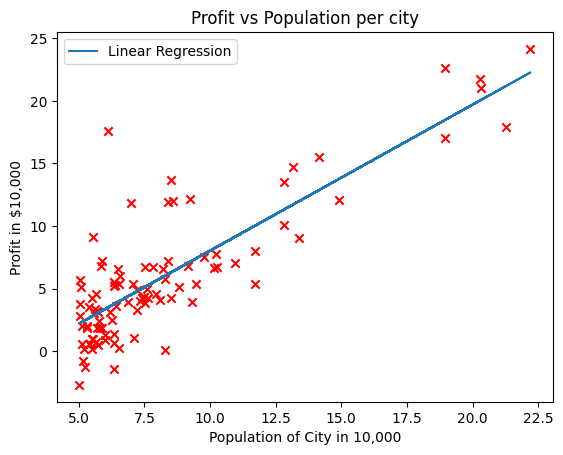

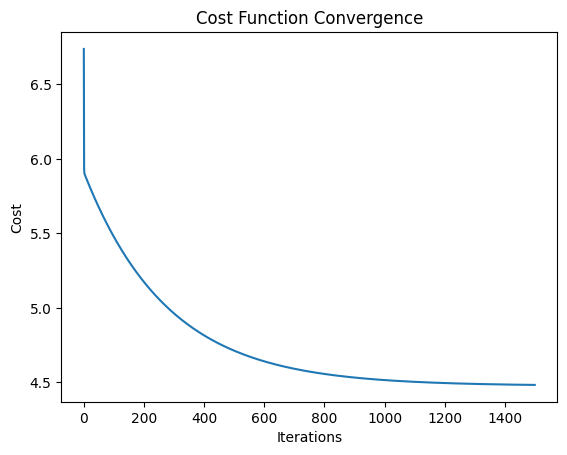

In [9]:

# Calculate the cost function (Mean Squared Error)
def compute_cost(X, y, theta):
  m = len(y)
  predictions = X @ theta
  cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
  return cost

# Calculate the gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  cost_history = []

  for _ in range(iterations):
    predictions = X @ theta
    error = predictions - y
    gradient = (1 / m) * (X.T @ error)
    theta = theta - alpha * gradient
    cost_history.append(compute_cost(X, y, theta))

  return theta, cost_history


# Set the learning rate and number of iterations
alpha = 0.01
iterations = 1500

# Initialize theta with zeros
theta = np.zeros(2)

# Run gradient descent to find optimal theta
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Print the optimized coefficients
print("Optimized Theta (coefficients):", theta)

# Make predictions using the optimized coefficients
y_pred = X @ theta

# Plot the linear regression line along with the data
plt.scatter(x_train, y_train, marker='x', c='r')
plt.plot(x_train, y_pred, label='Linear Regression')
plt.title('Profit vs Population per city')
plt.xlabel('Population of City in 10,000')
plt.ylabel('Profit in $10,000')
plt.legend()
plt.show()


# Plot the cost function over iterations
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()